<a href="https://colab.research.google.com/github/Aondona93/D-analytics/blob/main/HIV_Prevalence_and_co_mobilities_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
HIV prevalence rate by state, 2017.

This shapefile provides HIV statistics by state that can be used in conjunction with the co-morbidities risk profile to provide more nuance on levels of risk by state.


Note that values of 0 mean there is no data for that particular state.


The source of data for HIV prevalence rates is the Nigeria Institute for Health Metrics and Evaluation (IHME), HIV Prevalence Geospatial Estimates 2000-2017.

Install dependencies for the project

In [1]:
!pip install pysal #for Construction and interactive editing of spatial weights matrices & graphs
!pip install contextily #contextily is a small package to retrieve and write to disk tile maps from the internet into geospatial raster files


import libaries and modules for the project

In [34]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
#import descartes
import geopandas as gpd#Libary for Geopspatial Analysis
from shapely.geometry import Point, Polygon# modules for geop analysis
from pysal.lib import weights # for weight assignment on hotspot maps
from pysal.explore import esda
from esda import getisord#for clustering
import numpy as np# for numerical analysis
from libpysal.weights import KNN # for clustering
from scipy.stats import zscore # for cluster assignments
from matplotlib.lines import Line2D # for dynamic mapping
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import pandas as pd
from matplotlib.colors import BoundaryNorm
%matplotlib inline

Load and Explore tha shape file

In [3]:
# Load the shapefile
gdf = gpd.read_file("/content/GRID3_Nigeria_-_HIV_Statistics_by_State.shp")
gdf.head()

,FID,place,iso3_cd,plc_typ,admnst_,hiv_ihm,qntl_hv,tb_moh,qntl_tb,Shape__Are,Shape__Len,geometry
0,1,Ogun,NGA,Administrative Division,State,2.507687,3,0.050,3,1.370666,9.717113,"POLYGON ((3.78992 7.1527, 3.79063 7.14977, 3.7..."
1,2,Anambra,NGA,Administrative Division,State,3.622096,4,0.034,1,0.388926,3.472349,"POLYGON ((7.22306 5.9323, 7.22047 5.93175, 7.2..."
2,3,Bayelsa,NGA,Administrative Division,State,4.748053,5,0.038,2,0.760749,5.286329,"POLYGON ((6.46106 4.71328, 6.47848 4.7139, 6.4..."
3,4,Delta,NGA,Administrative Division,State,2.617676,3,0.047,3,1.360282,8.791614,"POLYGON ((5.52688 5.40712, 5.53972 5.41472, 5...."
4,5,Edo,NGA,Administrative Division,State,2.388196,2,0.044,3,1.599218,7.956937,"POLYGON ((6.5755 6.49508, 6.56531 6.4943, 6.55..."


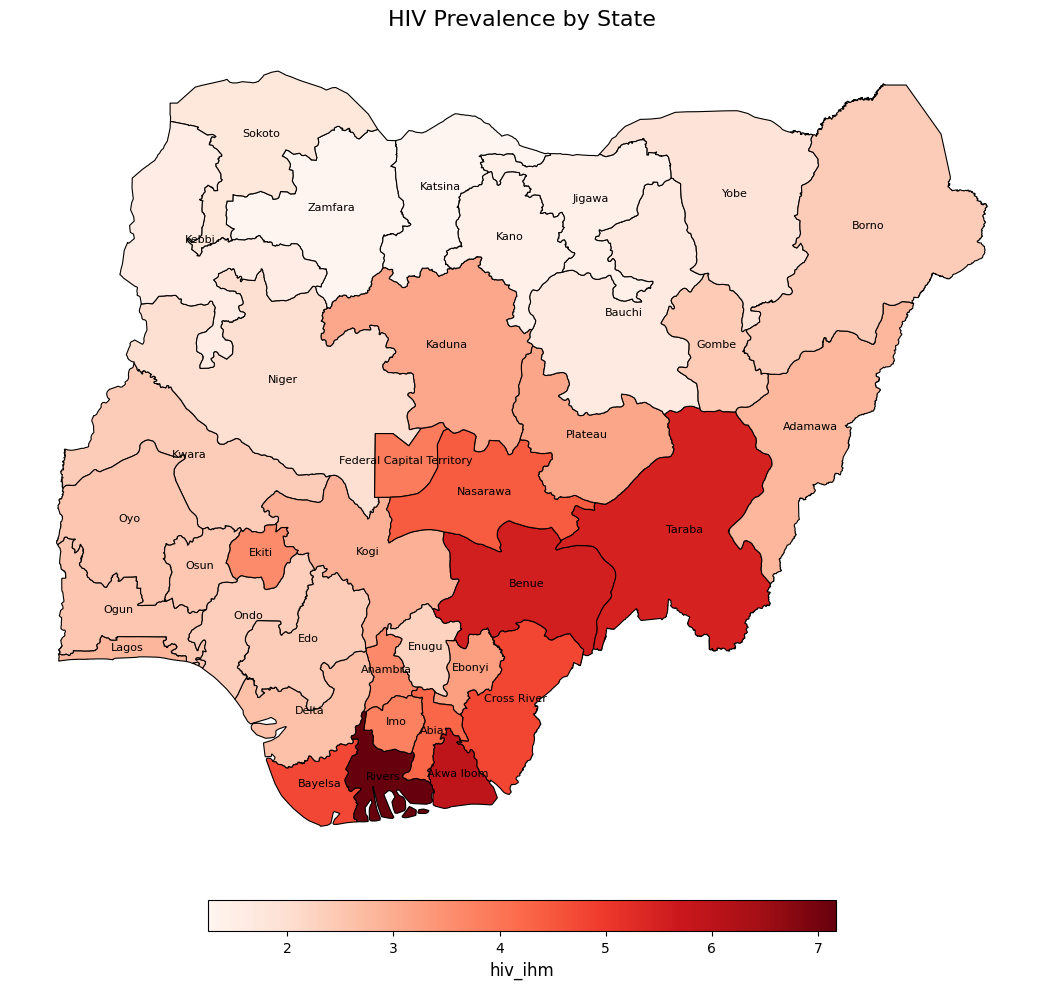

In [4]:
# Indicator to plot
indicator = 'hiv_ihm'
title = 'HIV Prevalence by State'

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Plot map
gdf.plot(column=indicator, cmap='Reds', linewidth=0.8, edgecolor='black', ax=ax)

# Annotate states with names
for idx, row in gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['place'], xy=(centroid.x, centroid.y),
                ha='center', fontsize=8, color='black')

# Create colorbar manually
norm = mpl.colors.Normalize(vmin=gdf[indicator].min(), vmax=gdf[indicator].max())
sm = mpl.cm.ScalarMappable(cmap='Reds', norm=norm)
sm._A = []  # Dummy array for ScalarMappable

# Horizontal colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.035, pad=0.04)

cbar.set_label(indicator, fontsize=12)

# Remove axes and add title
ax.axis('off')
ax.set_title(title, fontsize=16)
plt.tight_layout()
plt.show()


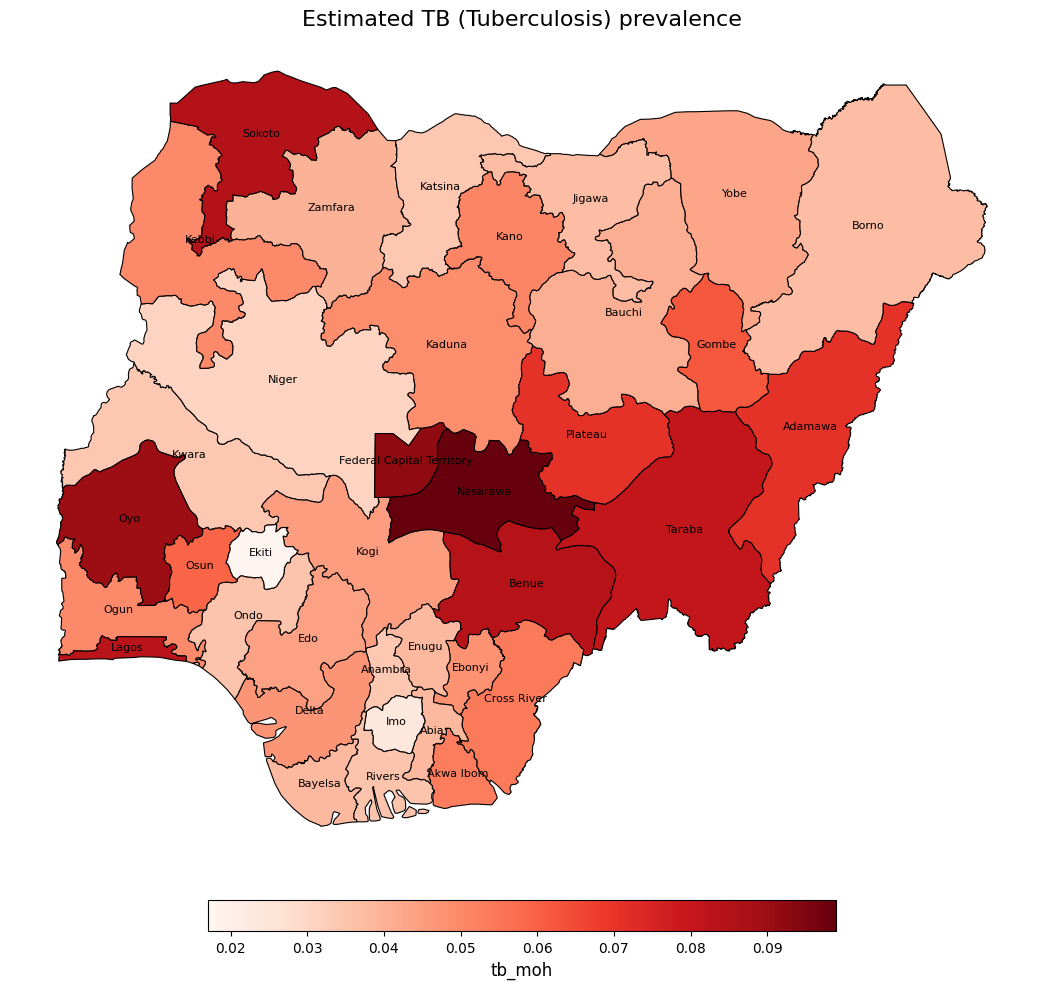

In [5]:
# Indicator to plot
indicator = 'tb_moh'
title = 'Estimated TB (Tuberculosis) prevalence'

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Plot map
gdf.plot(column=indicator, cmap='Reds', linewidth=0.8, edgecolor='black', ax=ax)

# Annotate states with names
for idx, row in gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['place'], xy=(centroid.x, centroid.y),
                ha='center', fontsize=8, color='black')

# Create colorbar manually
norm = mpl.colors.Normalize(vmin=gdf[indicator].min(), vmax=gdf[indicator].max())
sm = mpl.cm.ScalarMappable(cmap='Reds', norm=norm)
sm._A = []  # Dummy array for ScalarMappable

# Horizontal colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.035, pad=0.04)

cbar.set_label(indicator, fontsize=12)

# Remove axes and add title
ax.axis('off')
ax.set_title(title, fontsize=16)
plt.tight_layout()
plt.show()


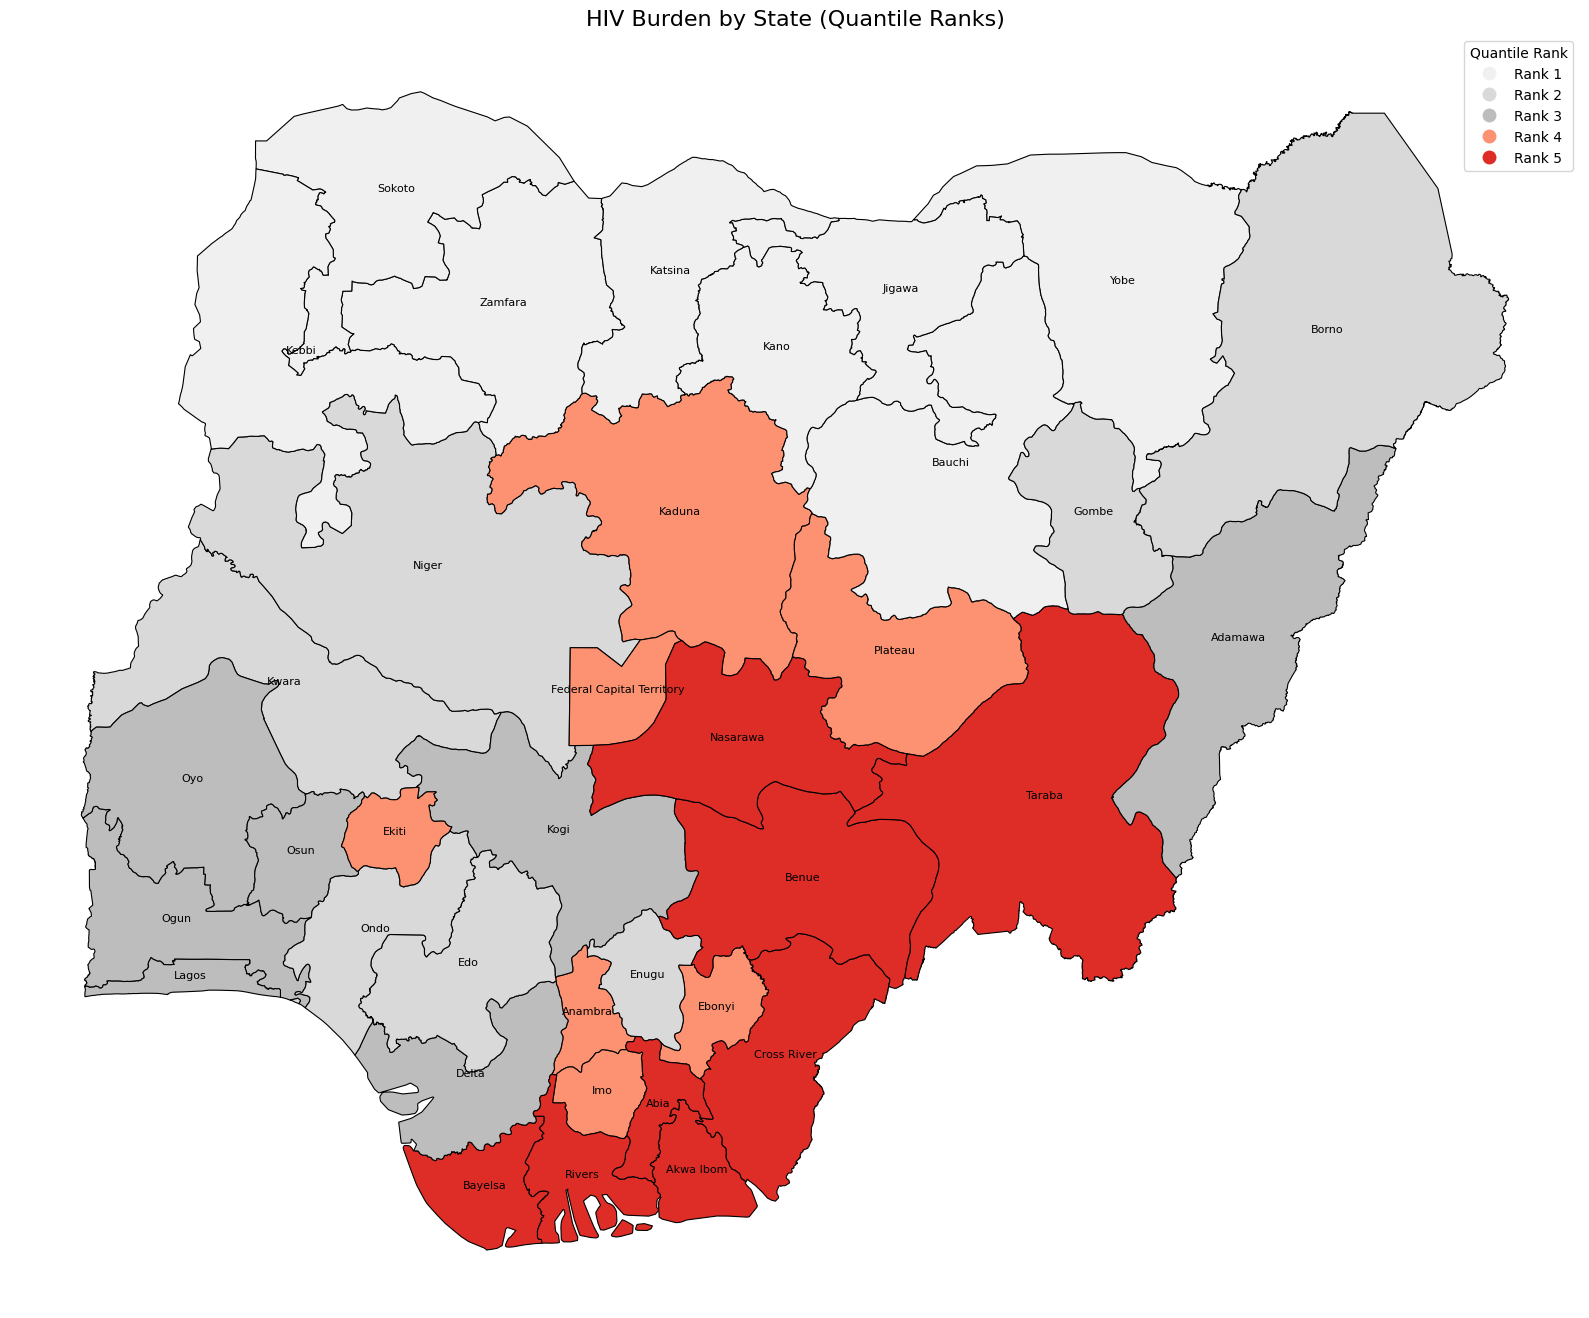

In [9]:


# Column to visualize
quantile_col = 'qntl_hv'

# Define custom color scale (1 to 5)
colors = ['#f0f0f0', '#d9d9d9', '#bdbdbd', '#fc9272', '#de2d26']  # light gray → red
cmap = ListedColormap(colors)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 14))
gdf.plot(column=quantile_col,
         cmap=cmap,
         linewidth=0.8,
         edgecolor='black',
         legend=True,
         categorical=True,
         ax=ax)

# Annotate state names
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(row['place'], xy=(centroid.x, centroid.y),
                ha='center', fontsize=8, color='black')

# Title and formatting
ax.axis('off')
ax.set_title('HIV Burden by State (Quantile Ranks)', fontsize=16)

# Adjust legend
legend = ax.get_legend()
if legend:
    legend.set_title("Quantile Rank")
    for i, text in enumerate(legend.get_texts()):
        text.set_text(f"Rank {i+1}")  # or 'Very Low' to 'Very High'

plt.tight_layout()
plt.show()


"This choropleth map displays the relative distribution of HIV indicators across Nigerian states using quantile ranks. States are grouped into five equal-sized categories based on their HIV burden. Each color represents a quantile rank — from 1 (lowest HIV burden) to 5 (highest HIV burden). This allows for easier comparison between states by showing which are relatively more or less affected. The map helps identify geographical patterns and clusters of high or low HIV prevalence relative to other states."

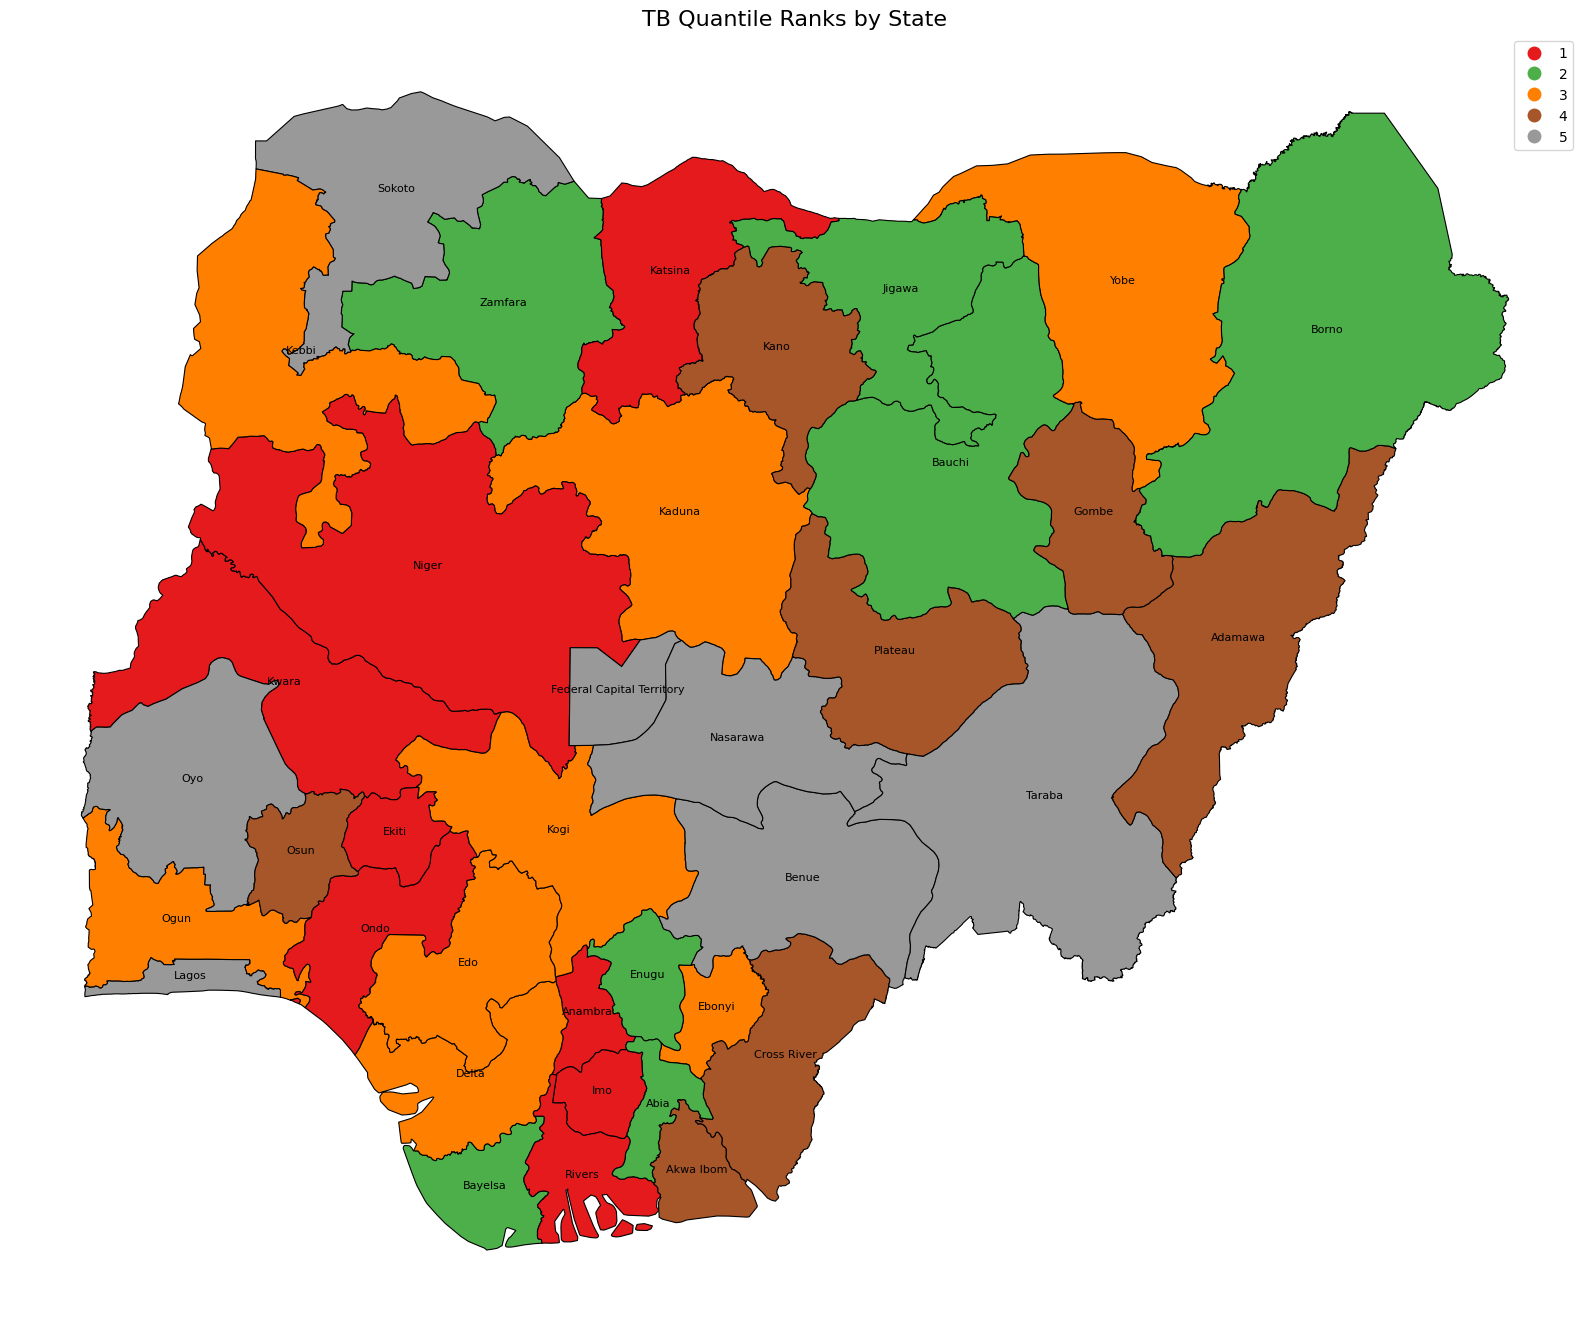

In [18]:
# Column to visualize
quantile_col = 'qntl_tb'

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 14))
gdf.plot(column=quantile_col,
         cmap='Set1',
         linewidth=0.8,
         edgecolor='black',
         legend=True,
         categorical=True,
         ax=ax)

# Annotate state names
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(row['place'], xy=(centroid.x, centroid.y),
                ha='center', fontsize=8, color='black')

# Format
ax.axis('off')
ax.set_title('TB Quantile Ranks by State', fontsize=16)
plt.tight_layout()
plt.show()


"This choropleth map displays the relative distribution of TB indicator across Nigerian states using quantile ranks.

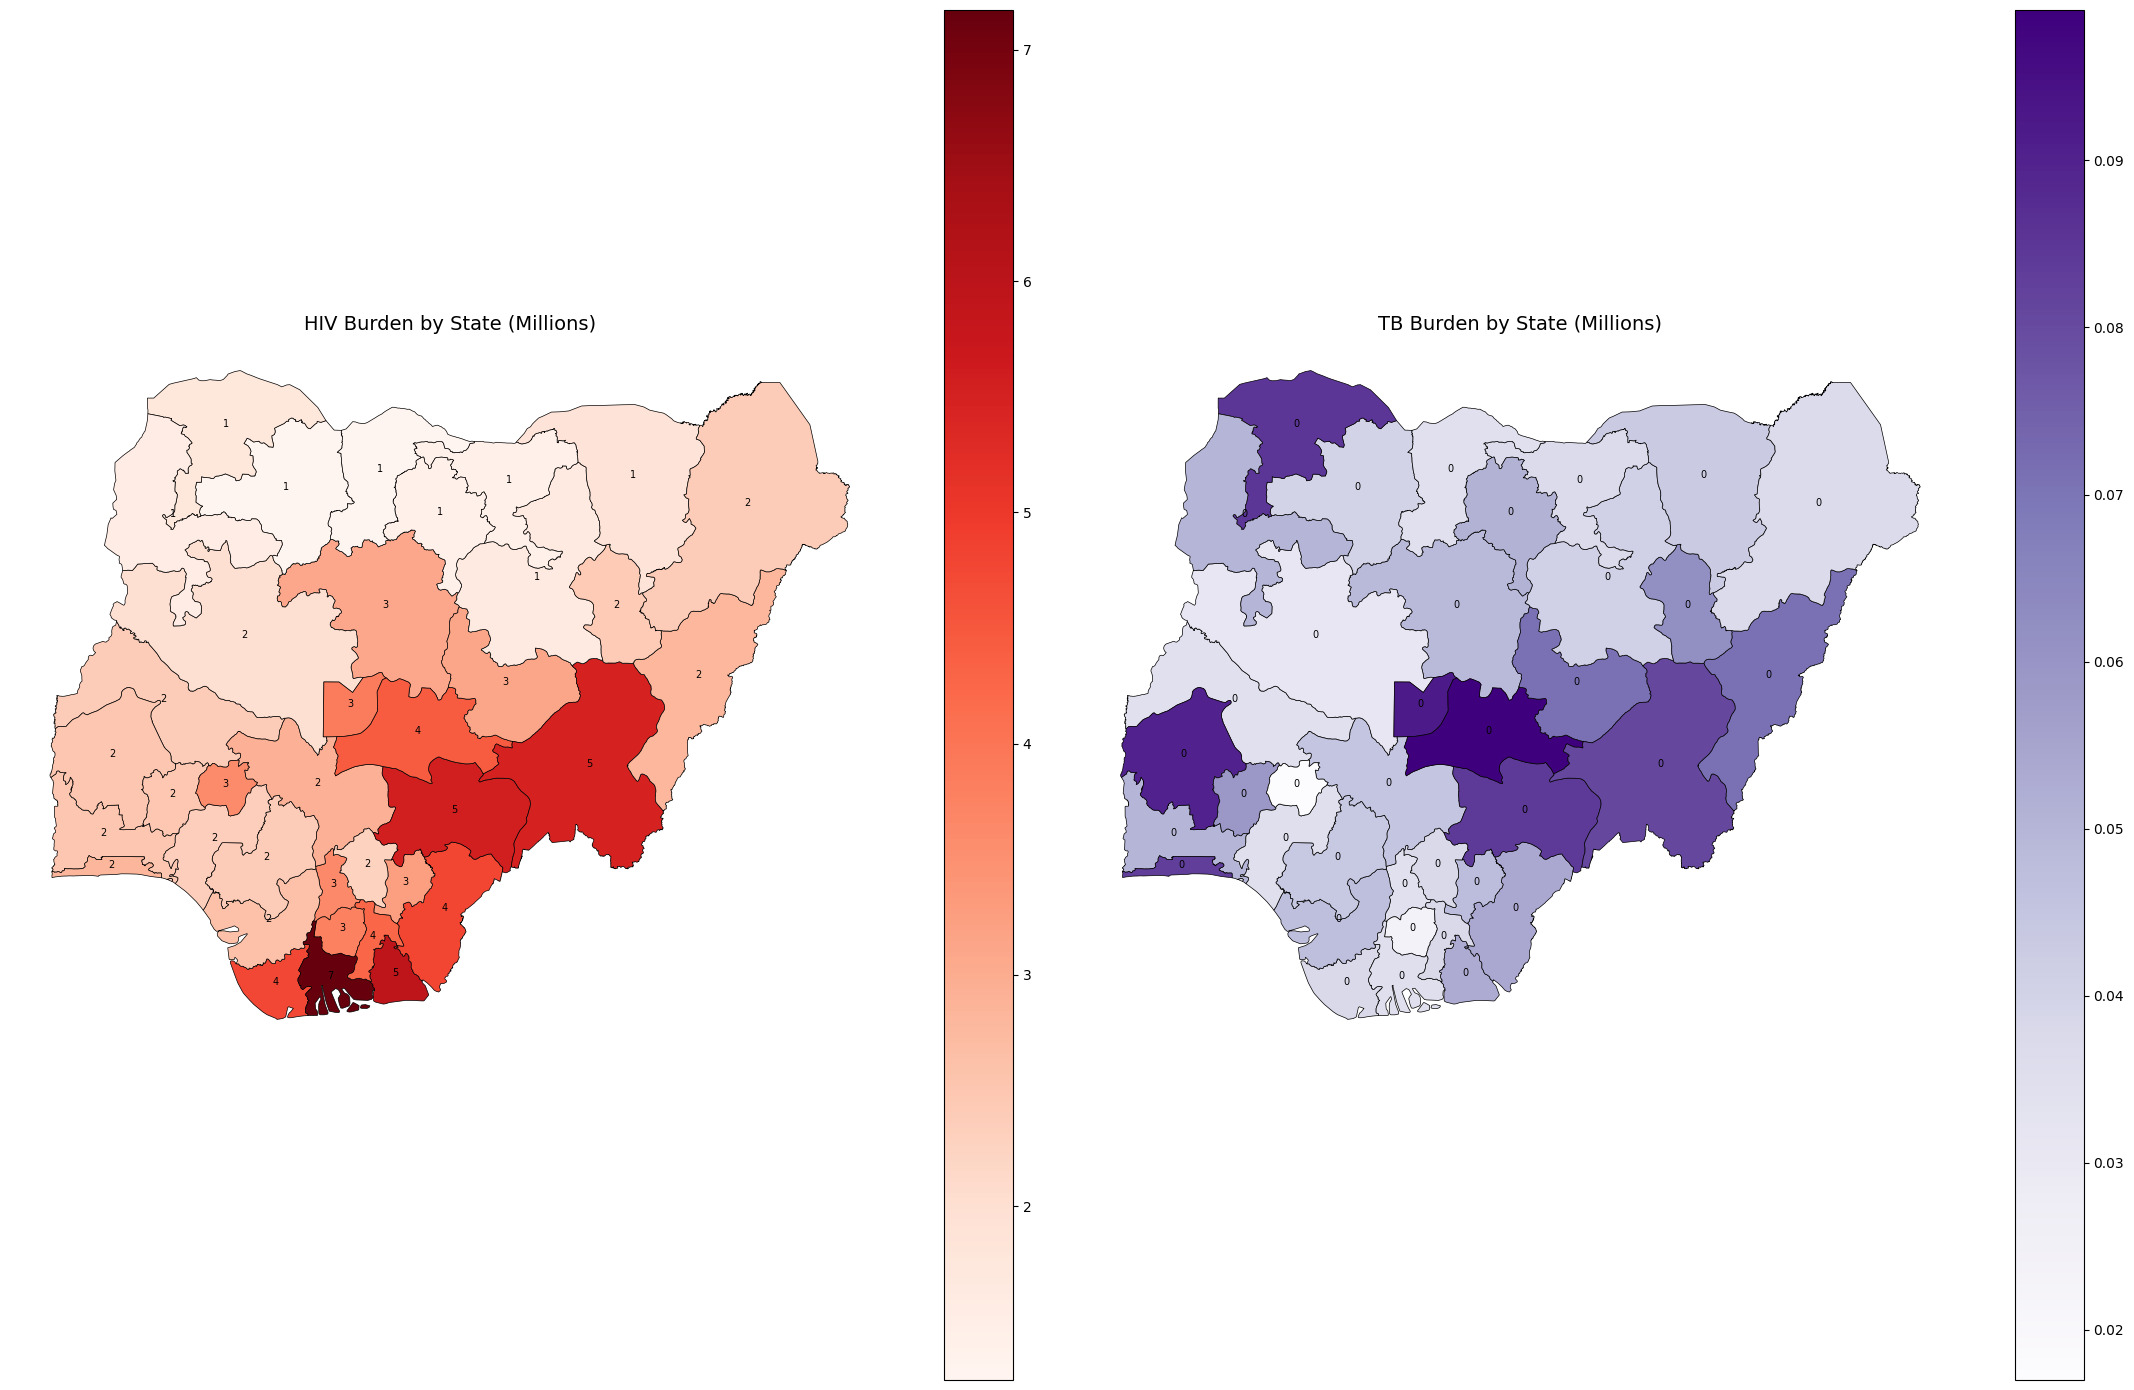

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(22, 14))

# HIV map
gdf.plot(column='hiv_ihm', cmap='Reds', linewidth=0.5, edgecolor='black',
         legend=True, ax=axes[0])
axes[0].set_title('HIV Burden by State (Millions)', fontsize=14)
axes[0].axis('off')

# Add labels
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    axes[0].annotate(f"{int(row['hiv_ihm'])}",
                     xy=(centroid.x, centroid.y), ha='center', fontsize=7)

# TB map
gdf.plot(column='tb_moh', cmap='Purples', linewidth=0.5, edgecolor='black',
         legend=True, ax=axes[1])
axes[1].set_title('TB Burden by State (Millions)', fontsize=14)
axes[1].axis('off')

# Add labels
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    axes[1].annotate(f"{int(row['tb_moh'])}",
                     xy=(centroid.x, centroid.y), ha='center', fontsize=7)

plt.tight_layout()
plt.show()


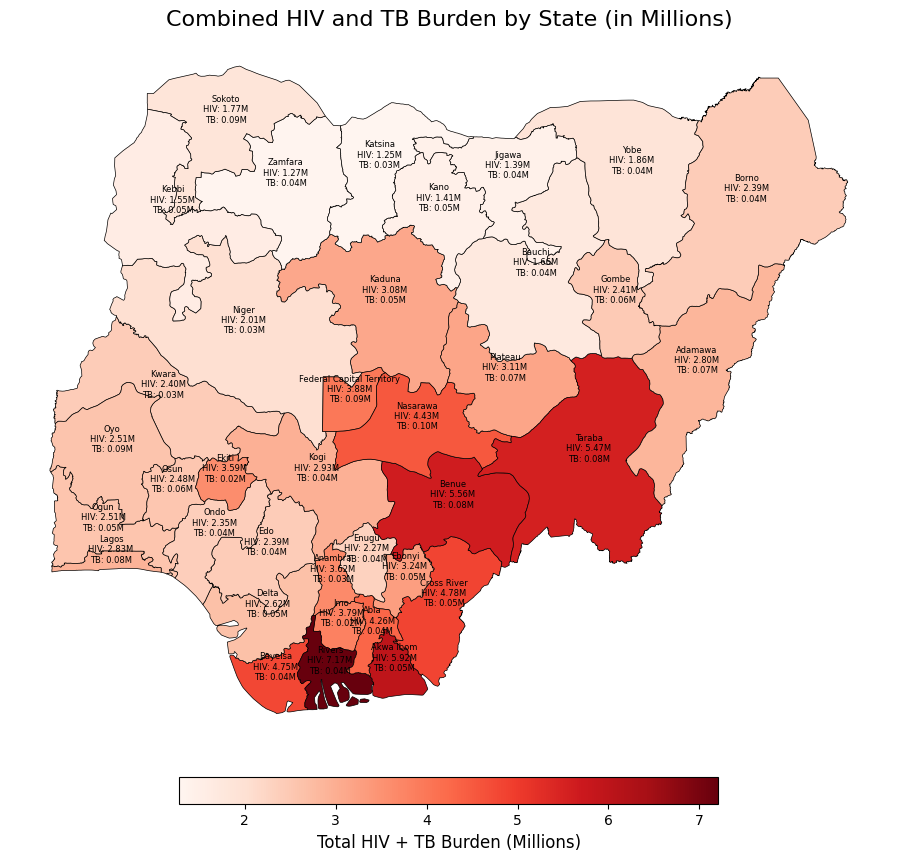

In [32]:
# Calculate total burden (values already in millions)
gdf['total_burden'] = gdf['hiv_ihm'] + gdf['tb_moh']

# Create figure and axis
fig, ax = plt.subplots(figsize=(22, 10))

# Colormap: red for high burden
cmap = plt.cm.Reds
norm = mpl.colors.Normalize(vmin=gdf['total_burden'].min(), vmax=gdf['total_burden'].max())

# Plot the map
gdf.plot(column='total_burden', cmap=cmap, linewidth=0.5, edgecolor='black', ax=ax)

# Add annotations with full decimal precision
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    label = f"{row['place']}\nHIV: {row['hiv_ihm']:.2f}M\nTB: {row['tb_moh']:.2f}M"
    ax.annotate(label,
                xy=(centroid.x, centroid.y),
                ha='center', fontsize=6)

# Add horizontal colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.035, pad=0.04)
cbar.set_label('Total HIV + TB Burden (Millions)', fontsize=12)

# Final touches
ax.set_title("Combined HIV and TB Burden by State (in Millions)", fontsize=16)
ax.axis('off');




## Hotspot Analysis

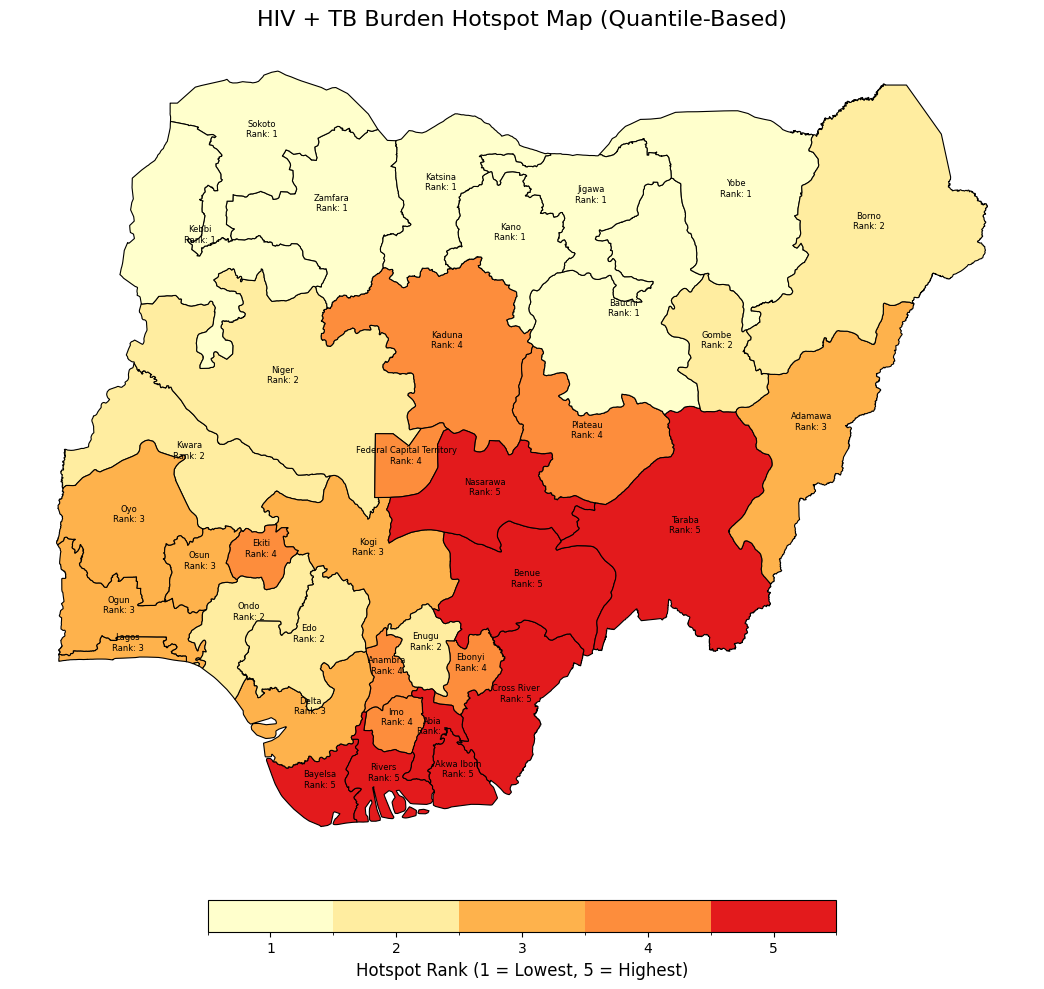

In [39]:

# Compute total burden
gdf['total_burden'] = gdf['hiv_ihm'] + gdf['tb_moh']

# Rank into 5 quantile bins
gdf['hotspot_rank'] = pd.qcut(gdf['total_burden'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Define colormap and normalization
colors = ['#ffffcc', '#ffeda0', '#feb24c', '#fd8d3c', '#e31a1c']
cmap = ListedColormap(colors)
norm = BoundaryNorm([1, 2, 3, 4, 5, 6], ncolors=cmap.N)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
gdf.plot(column='hotspot_rank', cmap=cmap, linewidth=0.8, edgecolor='black', ax=ax)

# Add annotations
for idx, row in gdf.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(f"{row['place']}\nRank: {row['hotspot_rank']}",
                xy=(centroid.x, centroid.y),
                ha='center', fontsize=6)

# Create ScalarMappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(gdf['hotspot_rank'])

# Add colorbar to correct axis
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.035, pad=0.04)
cbar.set_label("Hotspot Rank (1 = Lowest, 5 = Highest)", fontsize=12)
cbar.set_ticks([1.5, 2.5, 3.5, 4.5, 5.5])
cbar.set_ticklabels([1, 2, 3, 4, 5])

# Final formatting
ax.set_title("HIV + TB Burden Hotspot Map (Quantile-Based)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


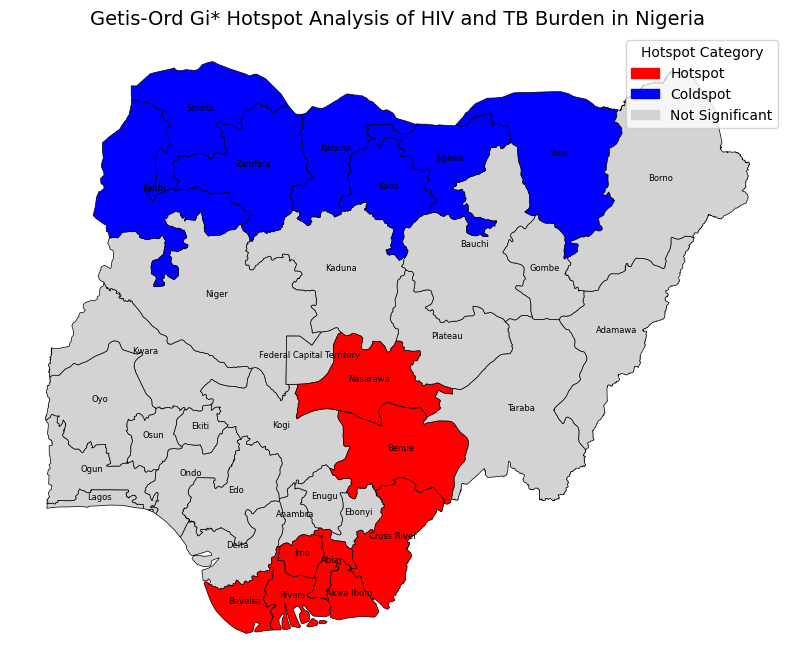

In [44]:
# Step 2: Create spatial weights matrix (Queen contiguity)
w = weights.Queen.from_dataframe(gdf, use_index=True)
w.transform = 'r'  # row-standardization

# Step 3: Extract values as numpy array (float)
total_burden_values = gdf['total_burden'].values.astype(float)

# Step 4: Calculate Getis-Ord Gi* statistic
gi_star = getisord.G_Local(total_burden_values, w)

# Step 5: Add Gi* scores and p-values to GeoDataFrame
gdf['GiZScore'] = gi_star.Zs
gdf['GiPValue'] = gi_star.p_sim

# Step 6: Define hotspot categories based on Gi* Z-scores and p-values
def hotspot_category(z, p):
    if p <= 0.05 and z > 0:
        return 'Hotspot'
    elif p <= 0.05 and z < 0:
        return 'Coldspot'
    else:
        return 'Not Significant'

gdf['Hotspot'] = [hotspot_category(z, p) for z, p in zip(gdf['GiZScore'], gdf['GiPValue'])]

# Step 7: Plotting the hotspot map
fig, ax = plt.subplots(figsize=(10, 15))

# Color map for hotspot categories
colors = {
    'Hotspot': 'red',
    'Coldspot': 'blue',
    'Not Significant': 'lightgrey'
}

gdf['color'] = gdf['Hotspot'].map(colors)

gdf.plot(color=gdf['color'], edgecolor='black', linewidth=0.5, ax=ax)

# Annotate LGA names
for idx, row in gdf.iterrows():
    if row.geometry is not None and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        ax.annotate(
            text=row['place'],
            xy=(centroid.x, centroid.y),
            ha='center',
            fontsize=6,
            color='black'
        )

plt.title('Getis-Ord Gi* Hotspot Analysis of HIV and TB Burden in Nigeria', fontsize=14)
plt.axis('off')

# Create a custom legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=c, label=l) for l, c in colors.items()]
ax.legend(handles=legend_handles, title='Hotspot Category')

plt.show()
